# Exercise: HPLC experiment

Credits [ESRF/BM29 beamline](https://www.esrf.fr/home/UsersAndScience/Experiments/MX/About_our_beamlines/bm29.html)

Process data from a [High-performance Liquid Chromatography (HPLC)](https://en.wikipedia.org/wiki/High-performance_liquid_chromatography) experiment performed on [ESRF/BM29 BioSAXS beamline](https://www.esrf.fr/home/UsersAndScience/Experiments/MX/About_our_beamlines/bm29.html).

<div align="center"><img src="img/BM29_picture.jpg" width="40%" alt="BM29 picture" /><img src="img/BM29_setup.jpg" width="40%" alt="BM29 setup" /></div>

The sample is [Bovin Serum Albumin (BSA)](https://en.wikipedia.org/wiki/Bovine_serum_albumin) protein (used as a standard sample):

<img src="img/Bovine_serum_albumin_3v03_crystal_structure.jpg" width="100px" alt="BSA"/>

The buffer and sample are exposed to X-rays while passing through a capillary.
Images are recorded over time (400 in this experiment) and an azimuthal integration is performed for each image with [pyFAI](http://www.silx.org/doc/pyFAI/latest/).

<div align="center"><img src="img/saxs_setup.jpg" alt="SAXS setup"/>
<img src="img/azimuthal_integration.png" alt="Azimuthal integration" width="400px" /></div>


This results in 400 curves of integrated intensities **I** for 1000 values of **q**.
Those **I** values are stored as a 2D dataset of shape (400, 1000) in the `intensities.npy` file.
The **q** values are stored in the `q.npy` file.

At first, only the buffer is passing through the capillary, then sample+buffer and finally buffer again.

The goal is to:

0. Separate integrated intensities corresponding to buffer+sample from those corresponding to buffer only
0. Estimate the buffer and the sample+buffer intensities by averaging the selected integrated intensities
0. Remove the buffer background from sample+buffer

## Preparation

In [1]:
%matplotlib widget
# This requires ipympl
# Or for non-interactive plots: %matplotlib inline

from matplotlib import pyplot as plt
import numpy

### Load data

Load intensities **I** from the "intensities.npy" file and **q** values from the `q.npy` file.

In [30]:
# intensities = #...
# q = #...
intensities = numpy.load("intensities.npy")
q = numpy.loadtxt("q.txt")

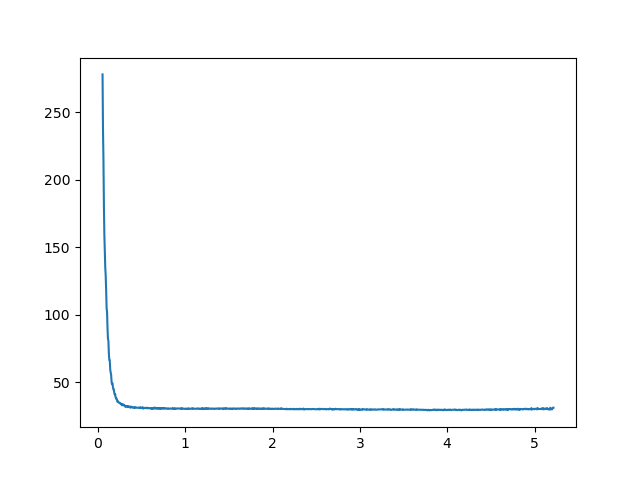

In [31]:
# Plot one curve
fig = plt.figure()
plt.plot(q, intensities[0])

## Average of all azimuthal integrations

Compute the averaged intensity over `intensities` for each value of `q`

In [23]:
# intensities_mean = #...
intensities_mean = numpy.mean(intensities, axis=0)

Text(0.5, 1.0, 'Average intensity')

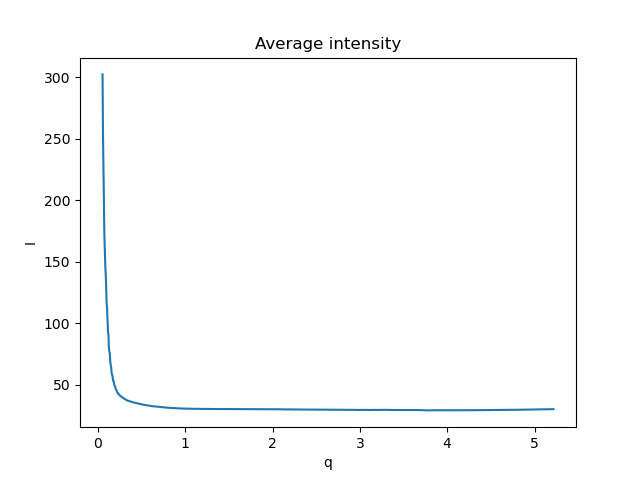

In [24]:
fig = plt.figure()
plt.plot(q, intensities_mean)
plt.xlabel("q")
plt.ylabel("I")
plt.title("Average intensity")

Note: This is not meaningful, the buffer and sample+buffer cases should be separated.

## Summed intensity of each azimuthal integration

Compute the sum of each row of the `intensities` data

In [21]:
# intensities_per_frame = #...
intensities_per_frame = numpy.sum(intensities, axis=1)

Text(0, 0.5, 'I')

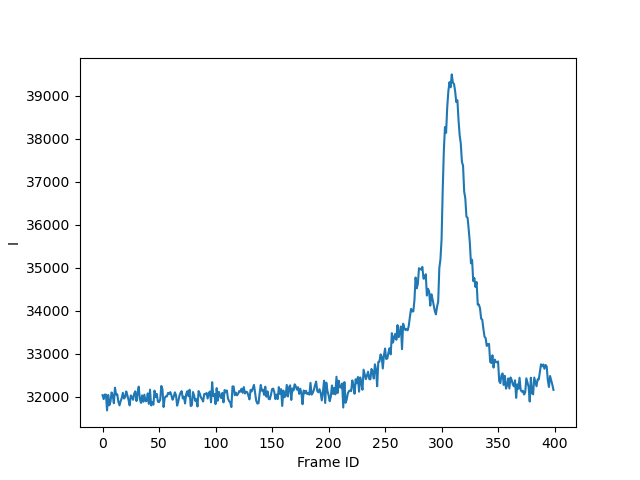

In [25]:
fig = plt.figure()
plt.plot(intensities_per_frame)
plt.xlabel("Frame ID")
plt.ylabel("I")

## Separate sample+buffer from buffer only

Select buffer and sample+buffer intensities by using a threshold over `intensities_summed`

In [17]:
# buffer = #...

sample_buffer_mask = intensities_summed > 33000
sample_buffer = intensities[sample_buffer_mask]

In [18]:
# sample_buffer = # ...

sample_buffer_mask = intensities_summed > 33000
sample_buffer = intensities[sample_buffer_mask]

In [19]:
print("buffer shape:", buffer.shape, "sample_buffer shape:", sample_buffer.shape)

buffer shape: (278, 1000) sample_buffer shape: (90, 1000)


## Average sample+buffer and buffer intensities

Compute the average of azimuthal integrations of `buffer` for each `q`.

In [8]:
# buffer_mean = #...
buffer_mean = numpy.mean(buffer, axis=0)

Do the same for `sample_buffer`.

In [9]:
# sample_buffer_mean = #...
sample_buffer_mean = numpy.mean(sample_buffer, axis=0)

Text(0, 0.5, 'I')

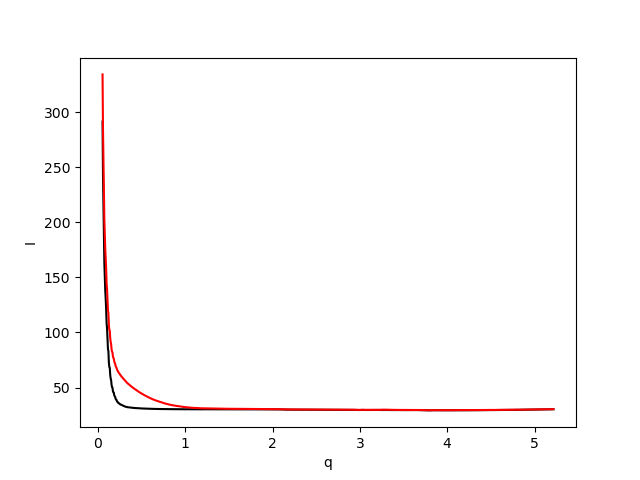

In [10]:
fig = plt.figure()
plt.plot(q, buffer_mean, 'black', q, sample_buffer_mean, 'red')
plt.xlabel("q")
plt.ylabel("I")

## Remove buffer background

Compute the different between `sample_buffer_mean` and `buffer_mean`.

In [11]:
# sample = #...
sample = sample_buffer_mean - buffer_mean

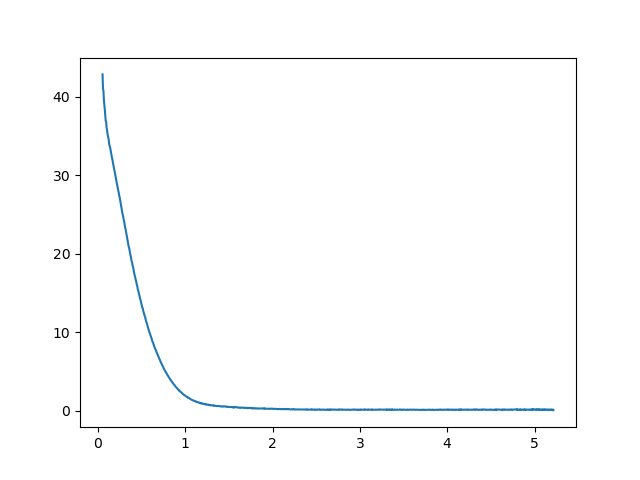

In [12]:
fig = plt.figure()
plt.plot(q, sample)